In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load data

def load_list(filename):
    vocabulary = []
    with open(filename, 'r') as f:
        for l in f:
            vocabulary.append(l.strip())
    return np.asarray(vocabulary)

def load_csv(filename):
    import csv
    
    sentence = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            sentence.append(str(row))
    return np.asarray(sentence).flatten()
    
pos_related = load_csv('./sentence_data/pos_related.csv')
neg_related = load_csv('./sentence_data/neg_related.csv')
pos_unrelated = load_csv('./sentence_data/pos_unrelated.csv')
neg_unrelated = load_csv('./sentence_data/neg_unrelated.csv')

In [3]:
print(pos_related.shape)
print(neg_related.shape)
print(pos_unrelated.shape)
print(neg_unrelated.shape)

(500,)
(500,)
(500,)
(500,)


In [5]:
print(pos_related[:10])

["['not perfect by a long shot, but definitely good for a smile on a bad day.']"
 "['the whole cast was great, each character had their own personality and charm.']"
 '[\'even though it has one of the standard "revenge price plot," this film is my favorite of vincent price\\\'s work.\']'
 "['i really enjoyed this movie, it is really fun to watch get elvira into all these adventure, she is just great.']"
 "['with more laugh than any other third-in-a-disney-series movie, hakuna matata is worth watching - if only for the hot tub scene which is still funny despite being a little bit predictable.']"
 "['it is really a wonderful thriller i enjoyed very much']"
 "['when my sister said this movie was gonna be good i had second thought but i watched it and it was actually funny']"
 "['it touched me in a way that, even all these year later, still affects me.']"
 "['i strongly recommend seeing for all']"
 "['without a doubt, the best late night television ever.']"]


In [6]:
print(neg_related[:10])

["['i had numerous problem with this film']"
 "['dear god i do not know where to start why this movie sucked too much']"
 "['i was pretty disappointed']"
 "['if you are tempted to watch this movie, rip your eyeball out and flush them down the toilet']"
 "['the music there was was annoying, and boring']"
 "['someone must have been seriously joking when they made this film']"
 "['ugly then, uglier now']" "['this film is predictable']"
 '[\'even the supporting male character are all "bad"\']'
 "['trust me, this is one let down movie that you want to avoid and this comes from one huge denzel washington fan']"]


In [7]:
related_set = np.hstack((pos_related, neg_related))
print(related_set.shape)
y_related = np.ones(related_set.shape)
print(y_related.shape)

# pos_set = pos_related
# y_pos = np.ones(pos_set.shape)
# neg_set = neg_related
# y_neg = np.zeros(neg_set.shape)

(1000,)
(1000,)


In [8]:
unrelated_set = np.hstack((pos_unrelated, neg_unrelated))
print(unrelated_set.shape)
y_unrelated = np.zeros(unrelated_set.shape)
print(y_unrelated.shape)

(1000,)
(1000,)


In [9]:
X = np.hstack((related_set, unrelated_set))
y = np.hstack((y_related, y_unrelated))

# X = np.hstack((pos_set, neg_set))
# y = np.hstack((y_pos, y_neg))

X.shape

(2000,)

In [10]:
import pickle

def save_pickle(path, X):
    with open(path, 'wb') as f:
        pickle.dump(X, f)
def open_pickle(path):
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

X_train_sent = open_pickle('./sentence_data/imdb_sentence_xtrain.pickle')
X_test_sent = open_pickle('./sentence_data/imdb_sentence_xtest.pickle')
y_train = open_pickle('./sentence_data/imdb_sentence_ytrain.pickle')
y_test = open_pickle('./sentence_data/imdb_sentence_ytest.pickle')

In [11]:
X = np.hstack((X_train_sent, X_test_sent))
y = np.hstack((y_train, y_test))
# X.shape
y.shape

(2000,)

In [13]:
X_rel = X[y==1]
X_unrel = X[y==0]

In [15]:
X_rel.shape

(1000,)

In [19]:


print(len(X_rel[4].split()))
print(X_rel[4])

# X_sent_len = np.zeros(X_rel.shape[0])

# for i in range(len(X_sent_len)):
#     X_sent_len[i] = len(X_rel[i].split())

X_rel_sent = np.zeros(len(X_rel))
X_unrel_sent = np.zeros(len(X_unrel))

for i in range(len(X_rel_sent)):
    X_rel_sent[i] = len(X_rel[i].split())

for i in range(len(X_unrel_sent)):
    X_unrel_sent[i] = len(X_unrel[i].split())

def print_word_stat(title, X):
    print()
    print('--', title, 'Statistics --')

    print('Total sentences ', len(X))
    print('Max \t: ', int(np.max(X)))
    print('Min \t: ', int(np.min(X)))
    print('Mean \t: ', int(np.mean(X)))
    print('Median \t: ', int(np.median(X)))
    print()

# print_word_stat('Whole corpus', X_sent_len)
print_word_stat('Related Sentence', X_rel_sent)
print_word_stat('Unrelated Sentence', X_unrel_sent)


11
this film really surprised me as it is a comedy masterpiece

-- Related Sentence Statistics --
Total sentences  1000
Max 	:  84
Min 	:  1
Mean 	:  15
Median 	:  13


-- Unrelated Sentence Statistics --
Total sentences  1000
Max 	:  109
Min 	:  1
Mean 	:  17
Median 	:  15



In [20]:
from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
tf_vectorizer = CountVectorizer(lowercase=True, max_df=1.0, min_df=1, binary=True, token_pattern=token)
tf_vectorizer.set_params(ngram_range=(1,1))

X_train = tf_vectorizer.fit_transform(X_train_sent)
X_test = tf_vectorizer.transform(X_test_sent)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.33, random_state=42)

In [27]:
words = tf_vectorizer.get_feature_names()
print(len(words))
# print(words[500:600])

4532


In [26]:
print(y_train.shape)
print(y_test.shape)

(1333,)
(667,)


In [97]:
def lr_classifier_report(X_tr, y_tr, X_te, y_te, random_state=42, C=1.0):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import roc_curve, auc

    clf = LogisticRegression(random_state=random_state, C=C)
    clf.fit(X_tr, y_tr)

    y_predict = clf.predict(X_te)

    print('--------------')
    print('C=%.2f' %(C))
    print('--------------')
    print('Accuracy')
    print('Train:\t%.5f ' %(clf.score(X_tr, y_tr)))
    print('Test:\t%.5f ' %(clf.score(X_te, y_te)))
    
    print(classification_report(y_te,y_predict))
    
    precision, recall, _ = precision_recall_curve(y_te, y_predict)
    average_precision = average_precision_score(y_te, y_predict)
    
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    plt.show()
    plt.clf()
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_te, y_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return clf

--------------
C=1.00
--------------
Accuracy
Train:	0.98575 
Test:	0.75562 
             precision    recall  f1-score   support

        0.0       0.80      0.73      0.76       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



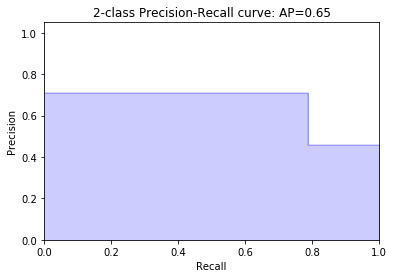

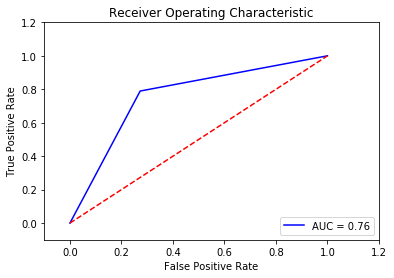

In [98]:
clf1 = lr_classifier_report(X_train, y_train, X_test, y_test, C=1.0)

--------------
C=0.10
--------------
Accuracy
Train:	0.88897 
Test:	0.75862 
             precision    recall  f1-score   support

        0.0       0.80      0.74      0.77       363
        1.0       0.71      0.79      0.75       304

avg / total       0.76      0.76      0.76       667



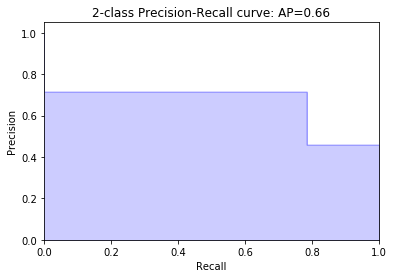

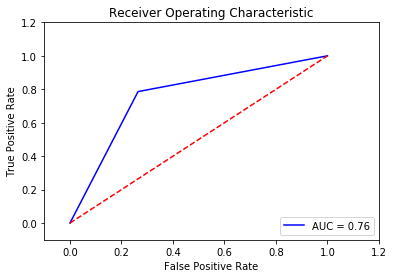

In [99]:
clf2 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.1)

--------------
C=0.01
--------------
Accuracy
Train:	0.76819 
Test:	0.69415 
             precision    recall  f1-score   support

        0.0       0.77      0.63      0.69       363
        1.0       0.64      0.77      0.70       304

avg / total       0.71      0.69      0.69       667



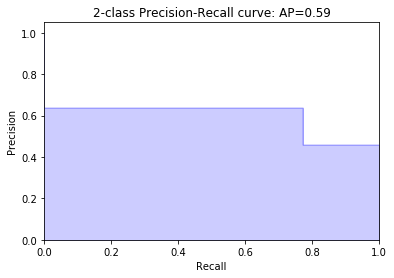

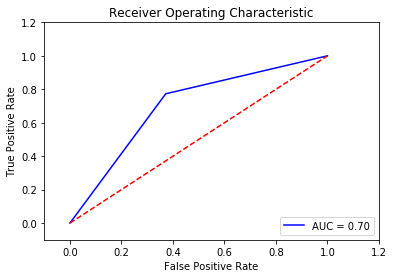

In [100]:
clf3 = lr_classifier_report(X_train, y_train, X_test, y_test, C=0.01)

In [96]:
weights = clf.coef_.flatten()
def negative_positive_counts(X, y, word_index):
    neg_count = np.sum(X[y==0, word_index])
    pos_count = np.sum(X[y==1, word_index])    
    return neg_count, pos_count

In [36]:
not_related_indices = np.argsort(weights)
related_indices = not_related_indices[::-1]

print("word\tweight\trelated\tunrelated")
for i in not_related_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
he	-1.42	11	59
remember	-1.35	1	15
into	-1.30	5	32
we	-1.01	8	24
try	-0.98	2	6
who	-0.98	23	61
lets	-0.95	0	8
art	-0.94	0	10
about	-0.91	27	48
school	-0.91	0	12


In [37]:
print("word\t\tweight\trelated\tunrelated")
for i in related_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word		weight	related	unrelated
awful		1.45	14	0
boring		1.39	11	1
disappointed		1.35	11	0
worth		1.32	16	0
recommend		1.28	17	0
performance		1.25	14	2
even		1.24	21	7
ever		1.23	31	6
scene		1.18	23	8
great		1.16	35	9


In [39]:
abs_indices = np.argsort(np.absolute(weights))[::-1]

print("word\tweight\trelated\tunrelated")
for i in abs_indices[:10]:
    unrel_cnt, rel_cnt = negative_positive_counts(X_train, y_train, i)
    print("%s\t%0.2f\t%d\t%d" %(words[i], weights[i], rel_cnt, unrel_cnt))

word	weight	related	unrelated
awful	1.45	14	0
he	-1.42	11	59
boring	1.39	11	1
disappointed	1.35	11	0
remember	-1.35	1	15
worth	1.32	16	0
into	-1.30	5	32
recommend	1.28	17	0
performance	1.25	14	2
even	1.24	21	7


In [25]:
def save_pickle(path, X):
    with open(path, 'wb') as f:
        pickle.dump(X, f)
def open_pickle(path):
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

X_te_clean = open_pickle("./pickles/imdb_x_te_clean.pickle")
y_te = open_pickle("./pickles/imdb_y_te.pickle")

In [26]:
def print_sentence(corpus):
    from textblob import TextBlob
    text = TextBlob(corpus)
    i = 0
    sent = []
    for sentence in text.raw_sentences:
        sent.append(sentence)
    return sent

In [27]:
# import nltk
# nltk.download('punkt')
test = print_sentence(X_te_clean[0])

test_matrix = tf_vectorizer.transform(test) 
test_matrix.shape

y_pred_test = clf.predict(test_matrix)
for i in range(len(test)):
    print(y_pred_test[i], ':' , test[i])

1.0 : this was an excellent show.
0.0 : it came on pbs back home in chicago and i remember cindy herron (from envogue) played the teen aged daughter.
0.0 : the show dealt with subject such as sex, peer pressure and puberty.
0.0 : it was about a middle class black family who had a teen aged daughter and son who moved to a middle class neighborhood from oakland or somewhere (i can not remember).
0.0 : i remember several episode but the one i remember most was when their cousin got her period for the first time.
0.0 : i was probably 7-8 when i first watched it and i was able to keep up with the program.
1.0 : this was a great show.
0.0 : i can not remember the name of the guy who played the son on the show, but i always got him confused with kevin hook.


In [28]:
test = print_sentence(X_te_clean[1])

test_matrix = tf_vectorizer.transform(test) 
test_matrix.shape

y_pred_test = clf.predict(test_matrix)
x_extracted_1 = ''
print(y_te[1])
for i in range(len(test)):
    if y_pred_test[i] == 1:
        x_extracted_1 += test[i]
        print('-', test[i])

1
- age cannot tarnish the beauty of this east-west love story for me.
- as mark elliott, william holden is intelligent, breezy and a bit weak; jennifer jone is perhaps well-nigh-perfect as dr. han suyin, by turns doubt-torn and ecstatic, eager and hesitant.
- other in the large cast include torin thatcher, isobel elsom, murray matheson, virginia gregg, richard loo, soo yong, philip ahn, jorja curtright and donna martell; many of hollywood's best oriental actor played smaller uncredited part also.
- the film is unarguably physically busy, interesting and often beautiful also.
- with cinematography by leon shamroy, ben nye's makeup and helen turpin's hairstyle, the great work by set decorator, sound and lighting, art department and all concerned, this has to be one of the most memorable production set in a major non-u.s. city of all time, and one of the most difficult to capture on film.
- truly, love is a many-splendored thing, dr. han says; and this movie stands as one of that doctrin

In [29]:
test = print_sentence(X_te_clean[3])

test_matrix = tf_vectorizer.transform(test) 
test_matrix.shape

y_pred_test = clf.predict(test_matrix)
x_extracted_3 = ''
print(y_te[3])
for i in range(len(test)):
    if y_pred_test[i] == 1:
        x_extracted_3 += test[i]
        print('-',test[i])

0
- i have yet to watch the first entry in this series, however, fortunately, i was still able to follow the complex and intricate plot, with all its unexpected twist and turn, and i applaud them for the utter originality of the concept herein.
- in case there is any confusion, let me leave no doubt as to the fact that everything i have just said is coated in pure, carefully nurtured sarcasm, the kind that flourish and grow exponentially when exposed to crap like this flick.
- a clear sign that this is unimpressive is that it was directed by a visual effect creator, whose only other credit in that field is a henry rooker film that was not well received.
- the action is not terrible.
- cinematography and editing are fine.
- language is infrequent, if even that.
- violence is fairly bloody.
- i recommend this solely to fan of b-movie, and i will say that you can do worse than this.


In [30]:
## Test the clf 3

X_tr_clean = open_pickle("./pickles/imdb_x_tr_clean.pickle")
y_tr = open_pickle("./pickles/imdb_y_tr.pickle")
cv = CountVectorizer(min_df=5, token_pattern=token)
X_train_ = cv.fit_transform(X_tr_clean)

In [31]:
X_train_.shape
y_tr.shape

(25000,)

In [32]:
x_extracted = np.hstack((x_extracted_1, x_extracted_3))
X_test_ = cv.transform(x_extracted)
y_test_ = [1, 0]

In [33]:
X_test_.shape

(2, 26255)

In [34]:
clf_2 = LogisticRegression()
clf_2.fit(X_train_, y_tr)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
clf_2.score(X_test_, y_test_)

1.0